# Objective:

Modeling of strength of high performance concrete using Machine Learning


# Steps and tasks:

1. Import the necessary libraries

2. Read the data as a data frame

3. Perform basic EDA which should include the following and print out your insights at every step. a. Shape of the data b. Data type of each attribute c. Checking the presence of missing values d. 5 point summary of numerical attributes e. Checking the presence of outliers

4. Perfom Univariate, Bi Variate and Multi Variate Analysis

5. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

6. Split the data into Training, Validation and Test Datasets

7. Train a few standard regression algorithms, note and comment on their performances along different metrics.

8. Perfom K means clustering on the scaled dataset

9. Build the ensemble models and compare the results with the base models

10. Apply PCA and transform the model. Apply basic regression algorithms on the transformed Data

11. Compare performances of all the models and conclude the best model on the test data

In [1]:
%matplotlib inline

In [2]:
#Loading required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [3]:
## Loading the dataset
df = pd.read_csv('concrete.csv')
df.head(30)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
df.tail(30)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1000,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,100,37.96
1001,233.8,0.0,94.6,197.9,4.6,947.0,852.2,28,22.84
1002,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,38.70
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
1004,250.0,0.0,95.7,191.8,5.3,948.9,857.2,28,27.22
1005,387.0,20.0,94.0,157.0,14.3,938.0,845.0,28,50.24
1006,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54
1007,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3,16.11
1008,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30
1009,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,28,45.71


In [5]:
df.shape # Shape of the data

(1030, 9)

In [6]:
## Viewling 5 point summary of dataset

df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.info() # Data Types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.isnull().values.any() ## Checking for Null values

False

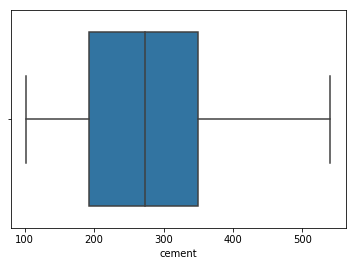

In [9]:
## Uni variate analysis
## Box Plots to identify the outliers in each variables

sns.boxplot(df['cement'])

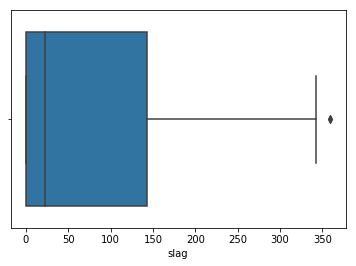

In [10]:
sns.boxplot(df['slag'])

In [11]:
q1 = np.quantile(df['slag'],0.25)
q2 = np.quantile(df['slag'],0.50)
q3 = np.quantile(df['slag'],0.75)
IQR = q3-q1
print(df['slag'].quantile(0.75)+(1.5 * IQR))

357.375


In [12]:
print('No. of Outliers in slag:',df[df['slag']>357.375]['slag'].shape[0])

No. of Outliers in slag: 2


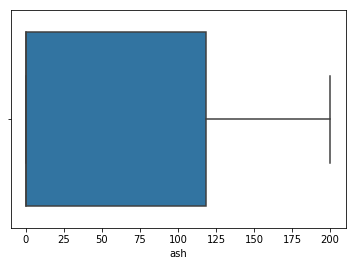

In [13]:
sns.boxplot(df['ash'])

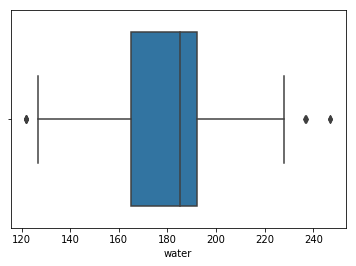

In [14]:
sns.boxplot(df['water'])

In [15]:
q1 = np.quantile(df['water'],0.25)
q2 = np.quantile(df['water'],0.50)
q3 = np.quantile(df['water'],0.75)
IQR = q3-q1
print(df['water'].quantile(0.75)+(1.5 * IQR))

232.64999999999998


In [16]:
print('No. of Outliers in water:',df[df['water']>232.64999999999998]['water'].shape[0])

No. of Outliers in water: 4


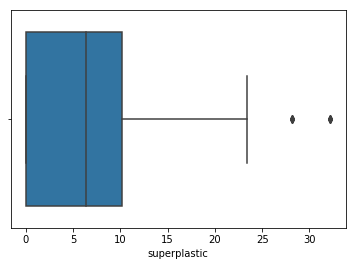

In [17]:
sns.boxplot(df['superplastic'])

In [18]:
q1 = np.quantile(df['superplastic'],0.25)
q2 = np.quantile(df['superplastic'],0.50)
q3 = np.quantile(df['superplastic'],0.75)
IQR = q3-q1
print(df['superplastic'].quantile(0.75)+(1.5 * IQR))

25.5


In [19]:
print('No. of Outliers in Superplastic:',df[df['superplastic']>25.5]['superplastic'].shape[0])

No. of Outliers in Superplastic: 10


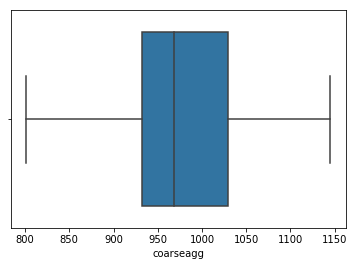

In [20]:
sns.boxplot(df['coarseagg'])

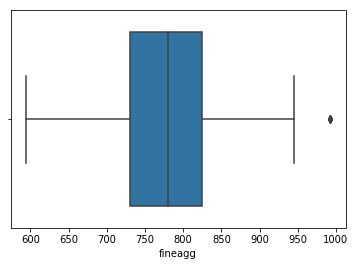

In [21]:
sns.boxplot(df['fineagg'])

In [22]:
q1 = np.quantile(df['fineagg'],0.25)
q2 = np.quantile(df['fineagg'],0.50)
q3 = np.quantile(df['fineagg'],0.75)
IQR = q3-q1
print(df['fineagg'].quantile(0.75)+(1.5 * IQR))

963.575


In [23]:
print('No. of Outliers in Fineagg:',df[df['fineagg']>963.575]['fineagg'].shape[0])

No. of Outliers in Fineagg: 5


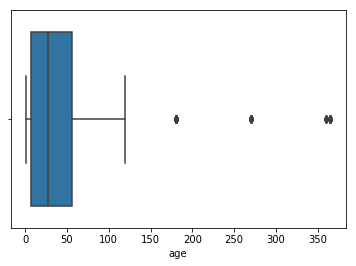

In [24]:
sns.boxplot(df['age'])

In [25]:
q1 = np.quantile(df['age'],0.25)
q2 = np.quantile(df['age'],0.50)
q3 = np.quantile(df['age'],0.75)
IQR = q3-q1
print(df['age'].quantile(0.75)+(1.5 * IQR))

129.5


In [26]:
print('No. of Outliers in age:',df[df['age']>129.5]['age'].shape[0])

No. of Outliers in age: 59


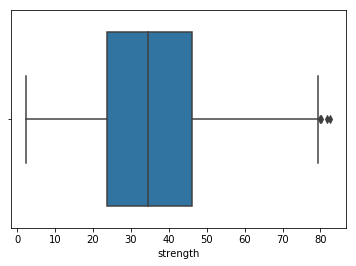

In [27]:
sns.boxplot(df['strength'])

In [28]:
q1 = np.quantile(df['strength'],0.25)
q2 = np.quantile(df['strength'],0.50)
q3 = np.quantile(df['strength'],0.75)
IQR = q3-q1
print(df['strength'].quantile(0.75)+(1.5 * IQR))

79.77250000000001


In [29]:
print('No. of Outliers in strength:',df[df['strength']>79.77250000000001]['strength'].shape[0])

No. of Outliers in strength: 4


In [30]:
df.isnull().values.any() ## No null values

False

In [31]:
## Outliers are present in the data
## No Null values but many zeros are there in data which might have impact in the model
## Replacing zeroes as Null values


df1=df.copy()
df1[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']] = df1[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']].replace(0,np.NaN)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            559 non-null float64
ash             464 non-null float64
water           1030 non-null float64
superplastic    651 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [32]:
df1.isnull().values.any()

True

In [33]:
df1.isnull().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [34]:
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29


In [35]:
data=df1.fillna(df1.median()) ## Filling the NaN value with the median of that column and assigning it a new name
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29


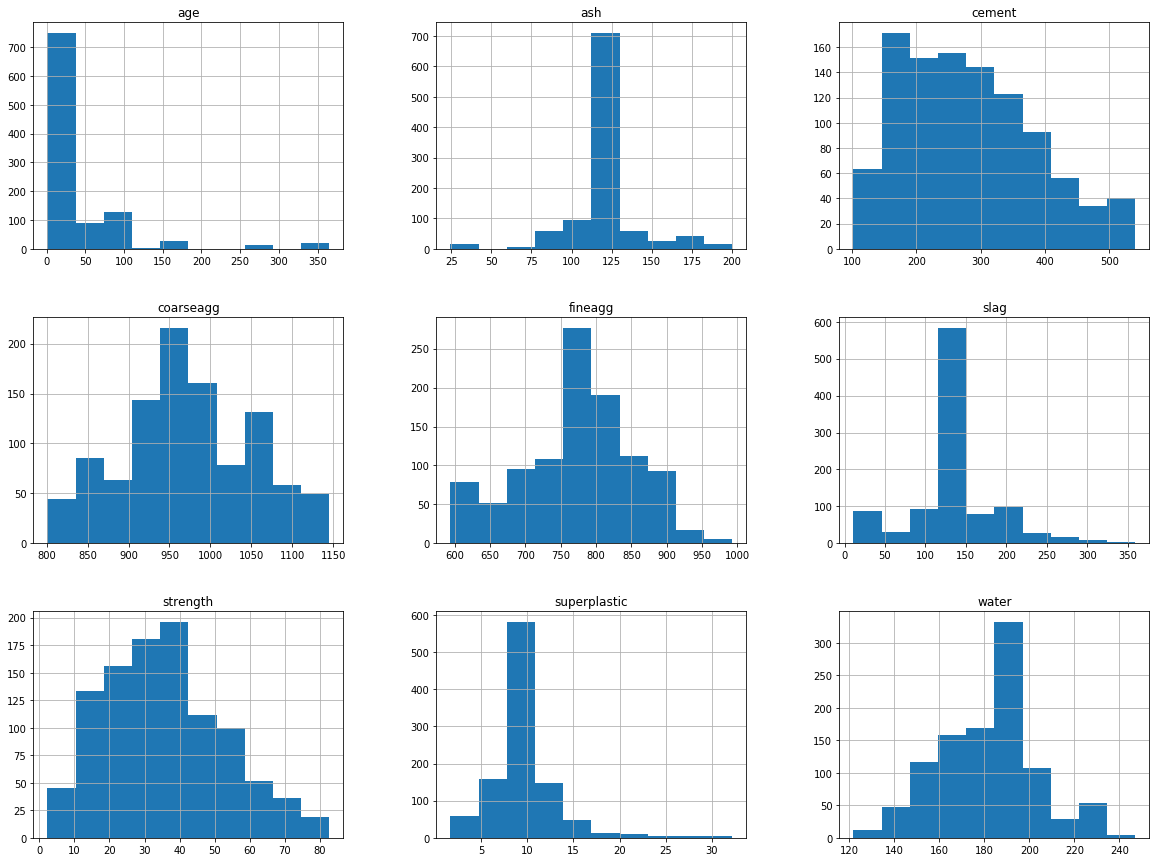

In [36]:
data.hist(figsize=(20, 15))
plt.show()

In [37]:
## Analysing the new data
con_data=data.copy()
con_data.head(30)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


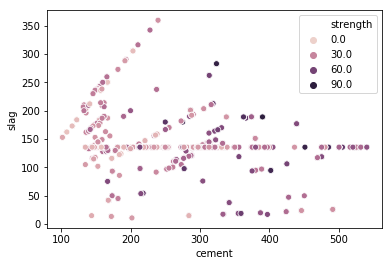

In [38]:
## Bi Variate Analysis
# Lets see the relation between other variables with the target variable
sns.scatterplot(x='cement',y='slag',hue='strength', data=con_data)

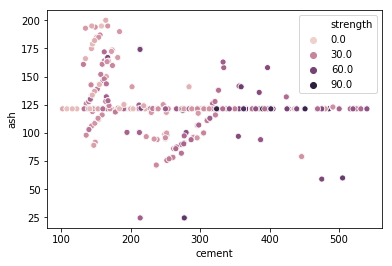

In [39]:
sns.scatterplot(x='cement',y='ash',hue='strength', data=con_data)

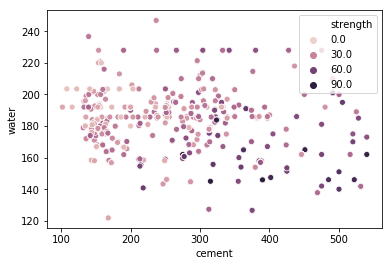

In [40]:
sns.scatterplot(x='cement',y='water',hue='strength', data=con_data)

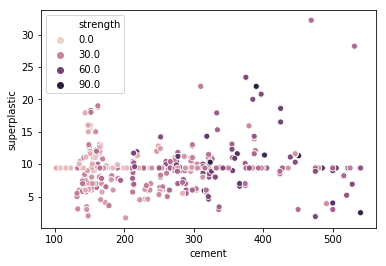

In [41]:
sns.scatterplot(x='cement',y='superplastic',hue='strength', data=con_data)

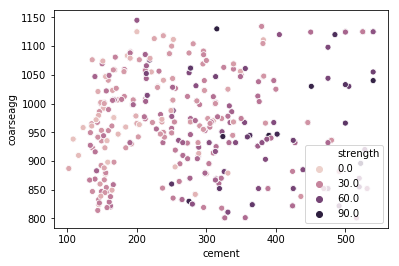

In [42]:
sns.scatterplot(x='cement',y='coarseagg',hue='strength', data=con_data)

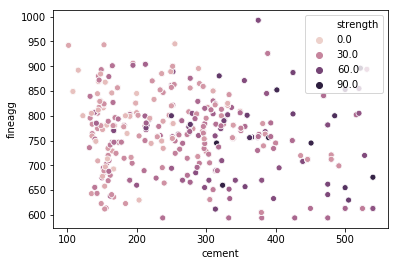

In [43]:
sns.scatterplot(x='cement',y='fineagg',hue='strength', data=con_data)

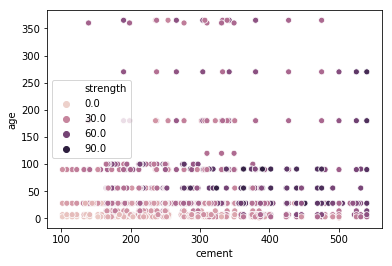

In [44]:
sns.scatterplot(x='cement',y='age',hue='strength', data=con_data)

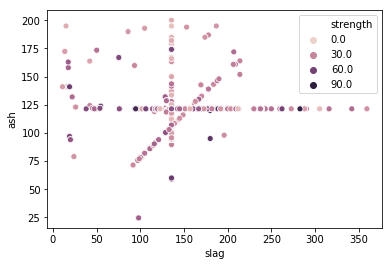

In [45]:
sns.scatterplot(x='slag',y='ash',hue='strength', data=con_data)

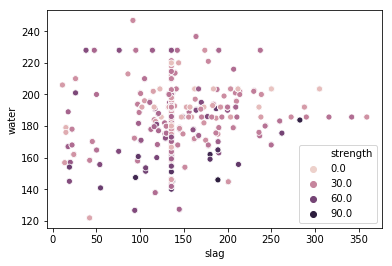

In [46]:
sns.scatterplot(x='slag',y='water',hue='strength', data=con_data)

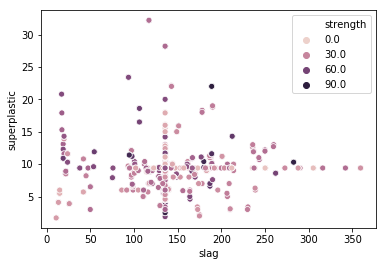

In [47]:
sns.scatterplot(x='slag',y='superplastic',hue='strength', data=con_data)

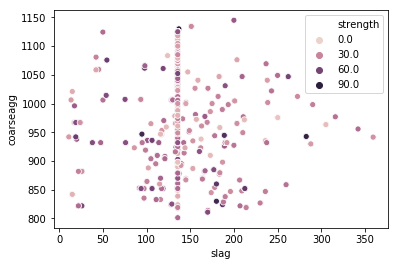

In [48]:
sns.scatterplot(x='slag',y='coarseagg',hue='strength', data=con_data)

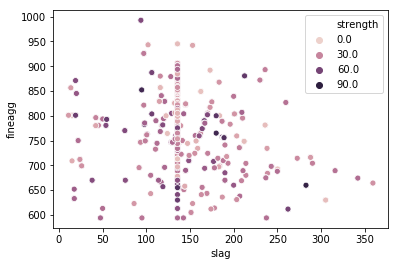

In [49]:
sns.scatterplot(x='slag',y='fineagg',hue='strength', data=con_data)

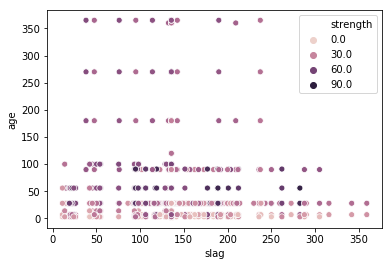

In [50]:
sns.scatterplot(x='slag',y='age',hue='strength', data=con_data)

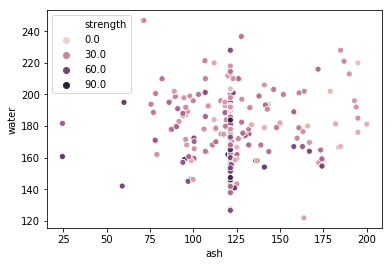

In [51]:
sns.scatterplot(x='ash',y='water',hue='strength', data=con_data)

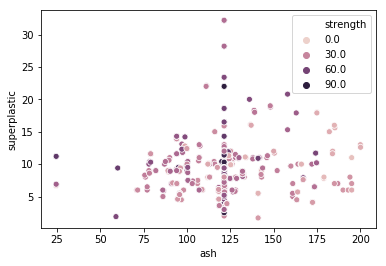

In [52]:
sns.scatterplot(x='ash',y='superplastic',hue='strength', data=con_data)

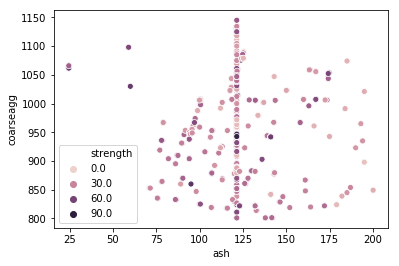

In [53]:
sns.scatterplot(x='ash',y='coarseagg',hue='strength', data=con_data)

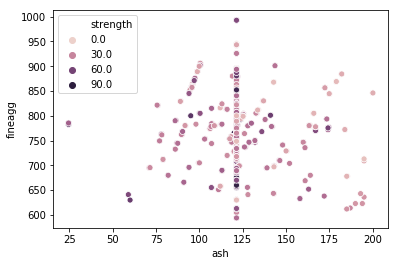

In [54]:
sns.scatterplot(x='ash',y='fineagg',hue='strength', data=con_data)

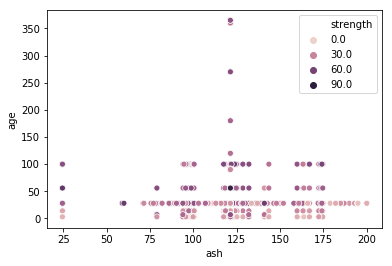

In [55]:
sns.scatterplot(x='ash',y='age',hue='strength', data=con_data)

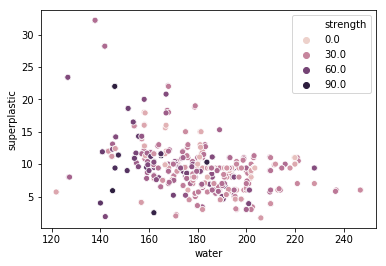

In [56]:
sns.scatterplot(x='water',y='superplastic',hue='strength', data=con_data)

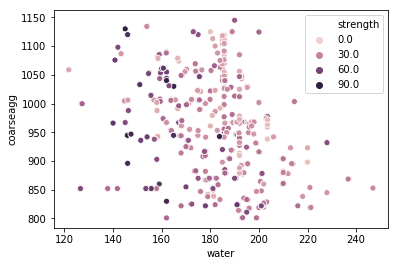

In [57]:
sns.scatterplot(x='water',y='coarseagg',hue='strength', data=con_data)

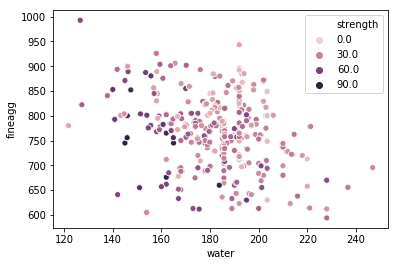

In [58]:
sns.scatterplot(x='water',y='fineagg',hue='strength', data=con_data)

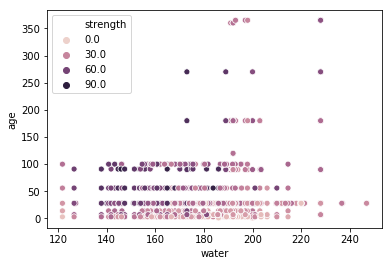

In [59]:
sns.scatterplot(x='water',y='age',hue='strength', data=con_data)

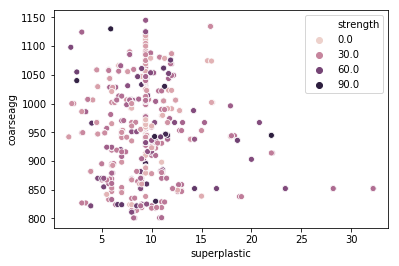

In [60]:
sns.scatterplot(x='superplastic',y='coarseagg',hue='strength', data=con_data)

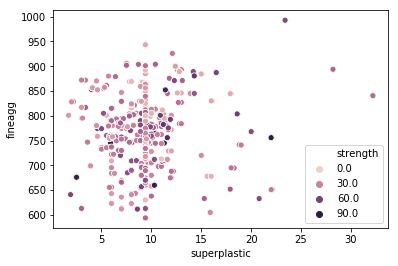

In [61]:
sns.scatterplot(x='superplastic',y='fineagg',hue='strength', data=con_data)

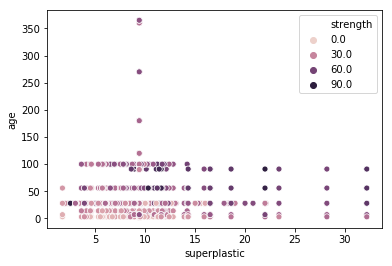

In [62]:
sns.scatterplot(x='superplastic',y='age',hue='strength', data=con_data)

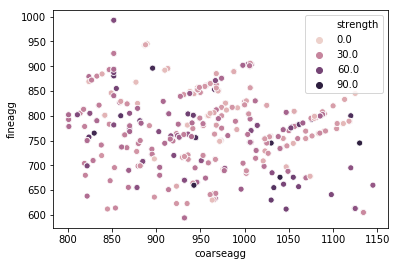

In [63]:
sns.scatterplot(x='coarseagg',y='fineagg',hue='strength', data=con_data)

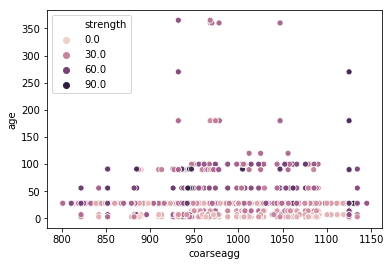

In [64]:
sns.scatterplot(x='coarseagg',y='age',hue='strength', data=con_data)

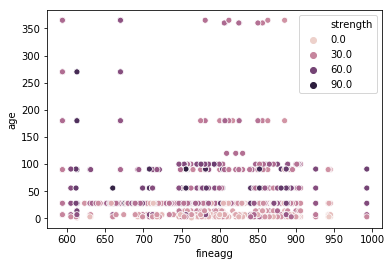

In [65]:
sns.scatterplot(x='fineagg',y='age',hue='strength', data=con_data)

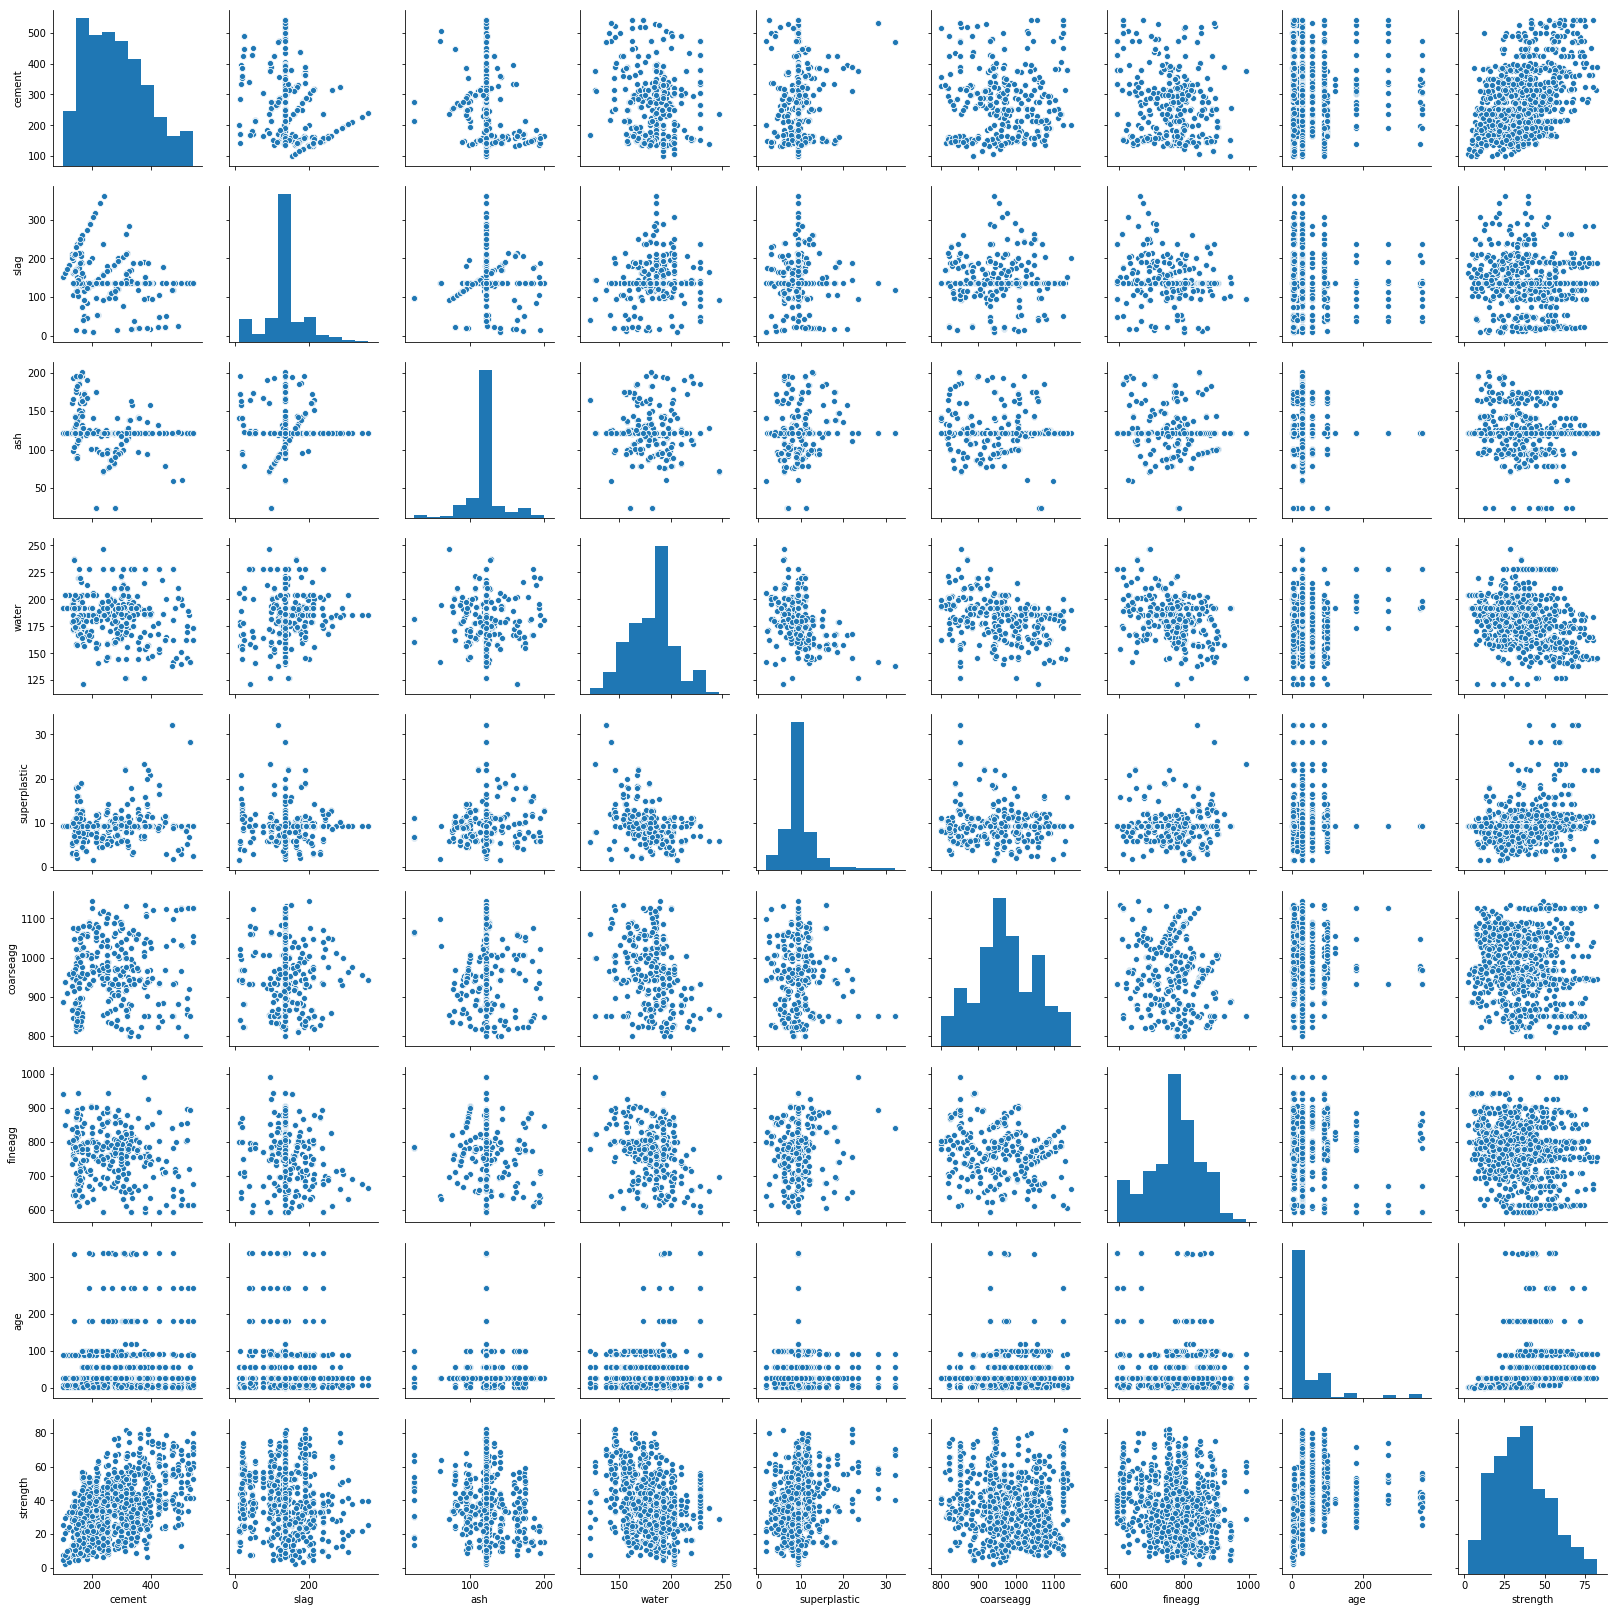

In [66]:
## Multivariate Analysis

sns.pairplot(con_data)

In [67]:
corr = con_data.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.257057,-0.196231,-0.081587,0.276856,-0.109349,-0.222718,0.081946,0.497832
slag,-0.257057,1.000000,0.046546,0.190766,0.021271,0.006770,-0.171175,-0.031405,-0.076045
ash,-0.196231,0.046546,1.000000,-0.029037,0.036498,-0.011546,-0.097634,0.001532,-0.130794
water,-0.081587,0.190766,-0.029037,1.000000,-0.420512,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.276856,0.021271,0.036498,-0.420512,1.000000,-0.177896,0.156046,-0.010325,0.241681
coarseagg,-0.109349,0.006770,-0.011546,-0.182294,-0.177896,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.171175,-0.097634,-0.450661,0.156046,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.031405,0.001532,0.277618,-0.010325,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,-0.076045,-0.130794,-0.289633,0.241681,-0.164935,-0.167241,0.328873,1.000000


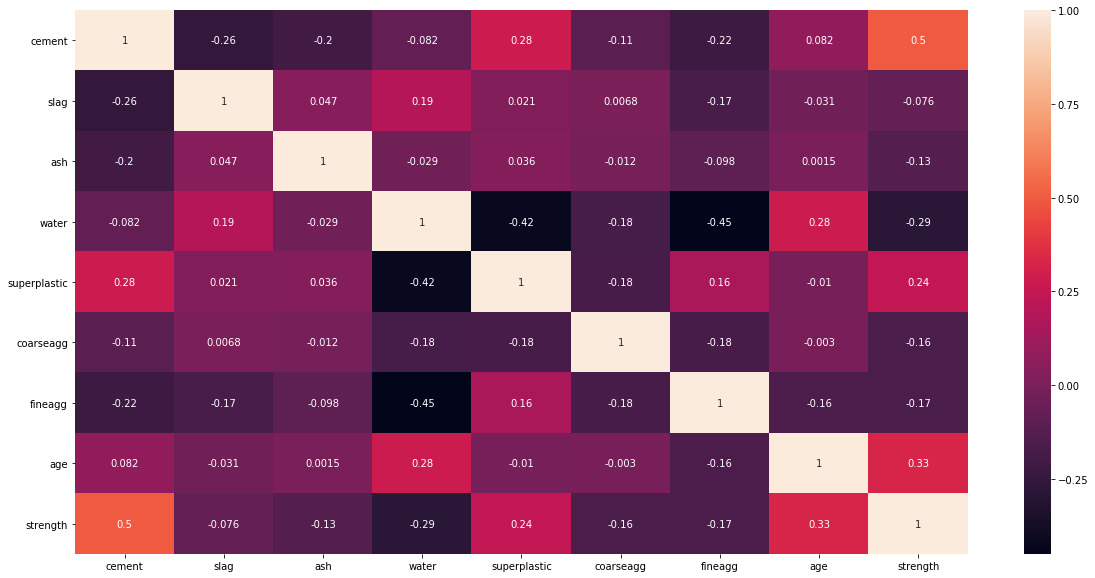

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [69]:
## Splitting of Data into Train, validation and test sets

from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = con_data.drop(['strength'], axis=1)
y = con_data['strength']

# Split X and y into training and test set in 90:10 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [70]:
# Split X_train and y_train into training and validation set in 80:20 ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [71]:
## To have an accurate score, let us create another set of data with scaling function applied to it.

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.1, random_state=10)
ZX_train, ZX_val, y_train, y_val = train_test_split(ZX_train, y_train, test_size=0.2, random_state=10)

In [72]:
## Building basic model

from sklearn.linear_model import LinearRegression # Import Linear Regression machine learning library
linear_model1 = LinearRegression()
linear_model1.fit(ZX_train, y_train)
y_predict_linear = linear_model1.predict(ZX_val)
coef_df = pd.DataFrame(linear_model1.coef_)
print(coef_df)

linear_model1_score = linear_model1.score(ZX_val, y_val)
print("The Linear Regression model accuracy is {}".format(linear_model1_score))

           0
0   5.393333
1   1.848870
2  -2.152408
3 -11.439978
4  -2.266430
5  -5.774221
6  -6.562075
7   7.965992
The Linear Regression model accuracy is 0.5892884203329989


In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly = PolynomialFeatures(degree = 3)
xpoly = poly.fit_transform(ZX_train)
model_3 = linear_model1.fit(xpoly,y_train)
pred = linear_model1.predict(xpoly)
taccuracy = r2_score(pred,y_train)
print("Accuracy of training set of degree 3 polynomial:",end='')
print(taccuracy)

xpoly = poly.fit_transform(ZX_val)
pred = linear_model1.predict(xpoly)
ttaccuracy = r2_score(pred,y_val)
print("Accuracy of testing set of degree 3 polynomial:",end='')
print(ttaccuracy)

Accuracy of training set of degree 3 polynomial:0.9073603533311548
Accuracy of testing set of degree 3 polynomial:0.8019153836428649


In [74]:
poly = PolynomialFeatures(degree = 2)
xpoly = poly.fit_transform(ZX_train)
model_3 = linear_model1.fit(xpoly,y_train)
pred = linear_model1.predict(xpoly)
taccuracy = r2_score(pred,y_train)
print("Accuracy of training set of degree 2 polynomial:",end='')
print(taccuracy)

xpoly = poly.fit_transform(ZX_val)
pred = linear_model1.predict(xpoly)
ttaccuracy = r2_score(pred,y_val)
print("Accuracy of testing set of degree 2 polynomial:",end='')
print(ttaccuracy)

Accuracy of training set of degree 2 polynomial:0.7273142212584469
Accuracy of testing set of degree 2 polynomial:0.6998485899059271


In [75]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=.3)
ridge1.fit(ZX_train,y_train)
print ("Ridge model:", (ridge1.coef_))

Ridge model: [  5.39361163   1.84618472  -2.15017059 -11.42513901  -2.2596229
  -5.76651333  -6.55375043   7.9593951 ]


In [76]:
print(ridge1.score(ZX_train, y_train))
print(ridge1.score(ZX_val, y_val))

0.6125036994906293
0.5893344417296944


In [77]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=1)
lasso1.fit(ZX_train,y_train)
print ("Lasso model:", (lasso1.coef_))

Lasso model: [ 5.02766305  0.12626129 -0.7166258  -7.08042952 -0.         -3.17245833
 -4.02630682  5.98584418]


In [78]:
print(lasso1.score(ZX_train, y_train))
print(lasso1.score(ZX_val, y_val))

0.5566905150940762
0.5412658838933967


In [79]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_model1 = SVR()
print(svr_model1)

svr_model1.fit(ZX_train,y_train)
svr_pred1 = svr_model1.predict(ZX_train)

svr_score1=svr_model1.score(ZX_val,y_val)
print(svr_score1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
0.5824423880895773


In [80]:
from sklearn.neighbors import KNeighborsRegressor

knn_model1 = KNeighborsRegressor(n_neighbors=5)
knn_model1.fit(ZX_train, y_train)
knn_pred1 = knn_model1.predict(ZX_val)
knn_score1=knn_model1.score(ZX_val,y_val)
print(knn_score1)

0.6191198756647611


In [81]:
from sklearn.ensemble import RandomForestRegressor

rf_model1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model1.fit(ZX_train, y_train)

rf_pred1 = rf_model1.predict(ZX_val)

rf_score1=rf_model1.score(ZX_val, y_val)
print(rf_score1)

0.9184958689789653


In [82]:
from sklearn.tree import DecisionTreeRegressor

dtregr_1 = DecisionTreeRegressor(max_depth=3)
dtregr_1.fit(ZX_train, y_train)
feature_importances = dtregr_1.feature_importances_

con_data_attr = con_data.iloc[:, 0:9]
feature_names = con_data_attr.columns[1:9]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

dtpred_1 = dtregr_1.predict(ZX_val)

dt_score1=dtregr_1.score(ZX_val, y_val)
print(dt_score1)


Index(['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'strength'],
      dtype='object')
[0.48685474 0.         0.         0.08380725 0.         0.
 0.         0.42933801]
Index(['slag', 'strength', 'superplastic', 'age', 'fineagg', 'coarseagg',
       'water', 'ash'],
      dtype='object') [0.48685474 0.         0.         0.08380725 0.         0.
 0.         0.42933801]
0.5897630422831975


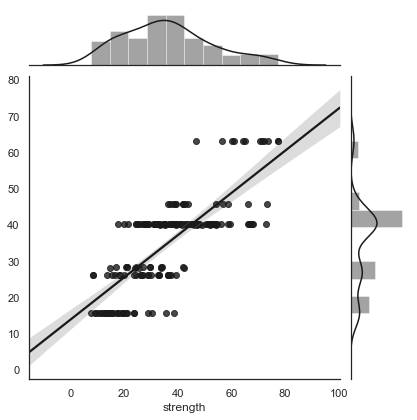

In [83]:
sns.set(style="darkgrid", color_codes=True)
         
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=dtpred_1, kind="reg", color="k");

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

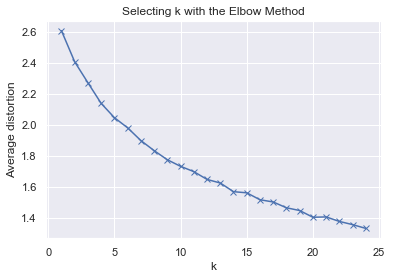

In [84]:
from sklearn.cluster import KMeans

condataAttr=con_data.iloc[:,1:]
concrete_data=condataAttr.apply(zscore)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,25)
meanDistortions=[]

for k in clusters:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(concrete_data)
    kmeans_pred=kmeans_model.predict(concrete_data)
    meanDistortions.append(sum(np.min(cdist(concrete_data, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / concrete_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [85]:
##Though the bend is not coming out clearly as there are many bends, let us look at 13 clusters and 16 clusters

# Let us first start with K = 13
final_model=KMeans(13)
final_model.fit(concrete_data)
prediction=final_model.predict(concrete_data)

#Append the prediction 
con_data["Group"] = prediction
concrete_data["Group"] = prediction

print("Groups Assigned : \n")
con_data_Clust = concrete_data.groupby(['Group'])
con_data_Clust.mean()
concrete_data.head()

Groups Assigned : 



,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Group
0,1.428083,0.022165,1.027590,-0.072306,-0.014398,-0.312970,-0.279733,-0.355018,12
1,-1.760412,0.150570,-1.090116,0.311871,1.388141,0.282260,-0.501465,-0.737108,9
2,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733,-0.395144,3
3,-0.412156,0.022165,2.175461,-0.072306,-0.526517,-1.292542,-0.279733,0.600806,6
4,0.891033,0.022165,0.549700,-0.154630,0.958372,-0.959363,-0.279733,-1.049727,1


In [86]:
con_data_Clust = concrete_data.groupby(['Group'])
con_data_Clust.mean()

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
Group,,,,,,,,
0,-0.629317,-4.086017,-0.355920,-0.467783,1.177647,-0.082849,-0.109242,0.544405
1,0.060779,0.047271,0.081331,-0.223963,1.123889,-0.258495,-0.431963,-0.655054
2,0.066292,-0.053452,0.389491,-0.404096,0.443378,0.131982,0.974967,0.328351
3,0.026549,-0.118623,0.457304,-0.431754,-0.536587,0.757369,-0.355240,-0.833508
4,-0.382737,0.022165,-2.163025,5.013466,-1.554617,1.689017,-0.137191,1.123635
5,-0.164025,0.022165,1.663359,-0.072306,-0.191548,-1.205656,3.910342,0.603633
6,-0.307758,-0.317831,1.227209,-0.379998,-1.029151,-0.899253,-0.222110,0.143492
7,-0.015101,-0.570573,-1.076061,0.234241,0.180762,1.224692,-0.175327,-0.003889
8,-0.590329,2.341478,-0.737369,-0.187241,0.460127,0.015146,-0.139716,-0.388556


0     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
1     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
2     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
3     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
4     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
5     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
6     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
7     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
8     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
9     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
10    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
11    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
12    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
dtype: object

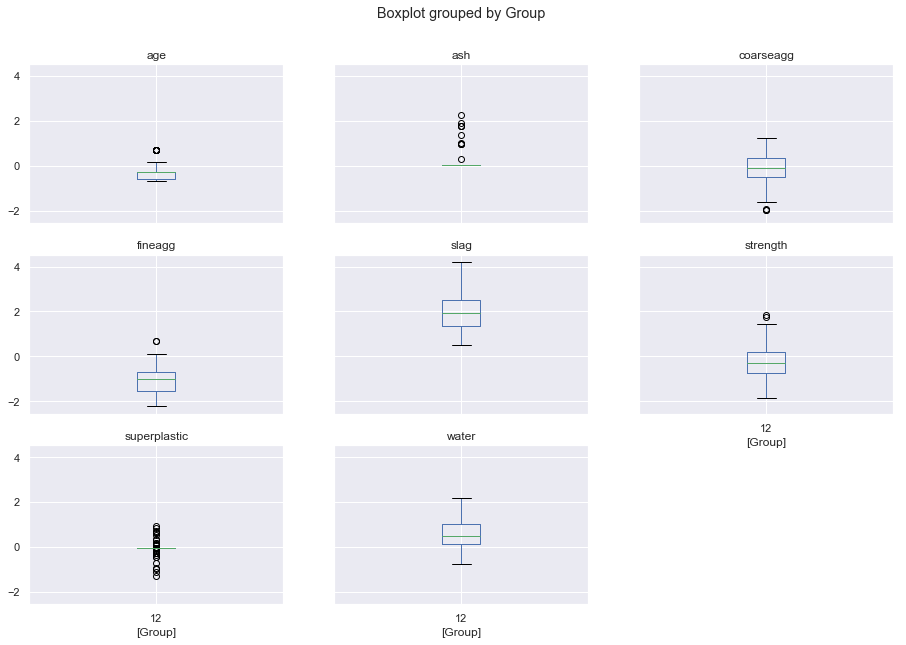

In [87]:
con_data_Clust.boxplot(by='Group', layout = (3,5),figsize=(15,10))

In [88]:
# Let us first start with K = 16
final_model=KMeans(16)
final_model.fit(concrete_data)
prediction=final_model.predict(concrete_data)

#Append the prediction 
con_data["Group"] = prediction
concrete_data["Group"] = prediction

print("Groups Assigned : \n")
concrete_data.head()

Groups Assigned : 



,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Group
0,1.428083,0.022165,1.027590,-0.072306,-0.014398,-0.312970,-0.279733,-0.355018,2
1,-1.760412,0.150570,-1.090116,0.311871,1.388141,0.282260,-0.501465,-0.737108,15
2,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733,-0.395144,1
3,-0.412156,0.022165,2.175461,-0.072306,-0.526517,-1.292542,-0.279733,0.600806,9
4,0.891033,0.022165,0.549700,-0.154630,0.958372,-0.959363,-0.279733,-1.049727,13


In [89]:
con_data_Clust = concrete_data.groupby(['Group'])
con_data_Clust.mean()

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
Group,,,,,,,,
0,-0.590329,2.341478,-0.737369,-0.187241,0.460127,0.015146,-0.139716,-0.388556
1,0.026549,-0.118623,0.457304,-0.431754,-0.536587,0.757369,-0.355240,-0.833508
2,2.004854,0.212558,0.447467,-0.070899,-0.156433,-1.027659,-0.314252,-0.281148
3,0.003520,0.022165,0.279663,-0.069812,1.975827,-1.939502,-0.034244,0.520201
4,-0.015101,-0.570573,-1.076061,0.234241,0.180762,1.224692,-0.175327,-0.003889
5,-0.382737,0.022165,-2.163025,5.013466,-1.554617,1.689017,-0.137191,1.123635
6,0.154089,0.108822,-1.166530,2.066149,-1.186244,0.748901,-0.143602,0.956659
7,-0.164025,0.022165,1.663359,-0.072306,-0.191548,-1.205656,3.910342,0.603633
8,-2.185956,0.856271,-0.704815,0.246535,-1.008123,-0.188481,-0.312918,0.804314


0     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
1     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
2     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
3     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
4     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
5     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
6     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
7     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
8     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
9     [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
10    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
11    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
12    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
13    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
14    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
15    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
dtype: object

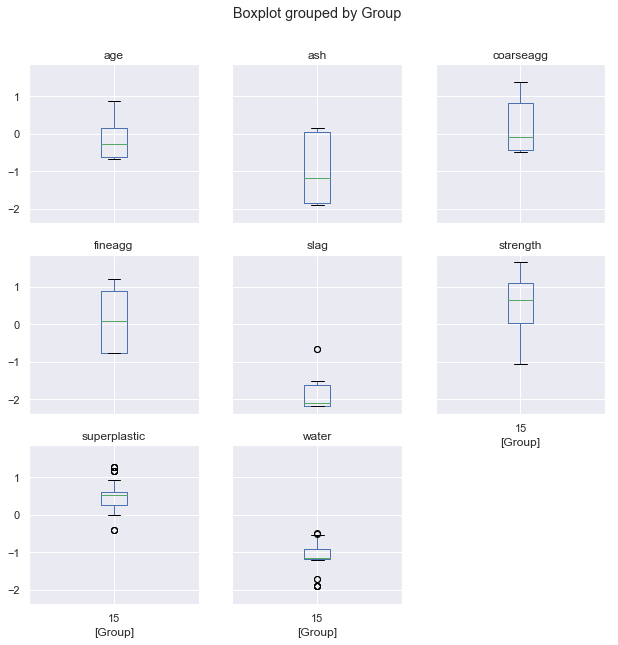

In [90]:
con_data_Clust.boxplot(by='Group', layout = (4,4),figsize=(10,10))

Applying Ensembling Techniques:

In [91]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29


In [92]:
X = data.drop(['strength'], axis=1)
y = data['strength']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [95]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.038351,0.022906,0.040322,0.529958,-0.088171,-0.390178,0.093086,-0.283905
1,1.816381,0.022906,0.040322,2.221551,-0.088171,-0.499864,-2.312972,0.750365
2,0.525989,0.022906,0.040322,0.764901,-0.088171,-0.040714,0.035321,-0.634223
3,0.004140,-2.247336,0.949663,-0.080895,-1.117271,-1.647741,0.286475,-0.700950
4,1.541224,-2.078056,-1.926824,-0.879703,0.492347,-0.053468,-0.831162,-0.283905


In [96]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [98]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,10.650121,0.596512
1,Ridge Regression,10.649641,0.596560
2,Lasso Regression,11.336330,0.543933
3,K Neighbors Regressor,9.993584,0.645767
4,Decision Tree Regressor,7.948365,0.771377
5,Random Forest Regressor,6.564948,0.852309
6,Gradient Boosting Regressor,5.867932,0.877597
7,Adaboost Regressor,8.389157,0.754189


In [99]:
##Gradient Boosting Regressor has the lowest RMSE, highest R-Squared
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
#tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=220, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9170664404402328


In [101]:
#tuning the tree specific parameters
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=310, min_weight_fraction_leaf=0.0,
             n_estimators=230, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9254584045631075


In [102]:
#now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=170, n_estimators=230*2, 
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, X_train_scaled, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.9239677766934635


Since score improved, the best model is GradientBoostingRegressor with learning_rate= 0.2/2, max_depth= 20, min_samples_split= 170, n_estimators= 230*2

In [103]:
#applying this model on validate data
X_val_scaled = pd.DataFrame(scaler.transform(X_val),
                             columns = X_val.columns)
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                min_samples_split=170, n_estimators=230*2, 
                                random_state=1).fit(X_train_scaled, y_train)
print("Validation set RMSE: ", np.sqrt(mean_squared_error(y_val, clf.predict(X_val_scaled))))
print("Validation set R^2: ", r2_score(y_val, clf.predict(X_val_scaled)))

Validation set RMSE:  4.021263238646041
Validation set R^2:  0.9387240316898807


In [104]:
## Apply PCA on the dataset

from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.428083,0.022165,1.027590,-0.072306,-0.014398,-0.312970,-0.279733
1,-1.074790,-1.760412,0.150570,-1.090116,0.311871,1.388141,0.282260,-0.501465
2,-0.298384,-0.004674,-1.115770,0.273274,-1.142514,-0.206121,1.093371,-0.279733
3,-0.145209,-0.412156,0.022165,2.175461,-0.072306,-0.526517,-1.292542,-0.279733
4,-1.209776,0.891033,0.022165,0.549700,-0.154630,0.958372,-0.959363,-0.279733


In [105]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00097182 -0.25730685 -0.19642136 -0.08166604  0.27712459 -0.10945526
  -0.22293429  0.08202566]
 [-0.25730685  1.00097182  0.04659153  0.19095146  0.02129118  0.00677655
  -0.17134148 -0.03143524]
 [-0.19642136  0.04659153  1.00097182 -0.02906531  0.03653394 -0.01155697
  -0.09772929  0.00153325]
 [-0.08166604  0.19095146 -0.02906531  1.00097182 -0.42092032 -0.18247076
  -0.45109913  0.27788802]
 [ 0.27712459  0.02129118  0.03653394 -0.42092032  1.00097182 -0.17806937
   0.15619761 -0.0103353 ]
 [-0.10945526  0.00677655 -0.01155697 -0.18247076 -0.17806937  1.00097182
  -0.17865441 -0.00301881]
 [-0.22293429 -0.17134148 -0.09772929 -0.45109913  0.15619761 -0.17865441
   1.00097182 -0.1562464 ]
 [ 0.08202566 -0.03143524  0.00153325  0.27788802 -0.0103353  -0.00301881
  -0.1562464   1.00097182]]


In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
print(pca.explained_variance_) ## Eigen values

[1.86288619 1.42945211 1.15041953 1.07877327 0.96866601 0.85703203
 0.39014808 0.27039733]


In [108]:
print(pca.components_) ## Eigen vectors

[[ 0.15522763 -0.26348551 -0.06461761 -0.61624841  0.45101612 -0.08424335
   0.48992111 -0.2683413 ]
 [ 0.70567166 -0.28508883 -0.2687139   0.15015678  0.24845734 -0.22390392
  -0.29578688  0.35587042]
 [ 0.11061608 -0.41155226 -0.31928948 -0.18440512 -0.37657926  0.72363804
  -0.10302534 -0.07974728]
 [ 0.16916309  0.26989421  0.52412022 -0.25709736  0.40023218  0.43735923
  -0.45415889  0.00327398]
 [-0.13105182 -0.60325084  0.62276531 -0.00738594 -0.13815252 -0.05357762
   0.14535296  0.43351874]
 [-0.23779391  0.27246194 -0.29786491 -0.12112216  0.23424689  0.27234218
   0.27226912  0.75010141]
 [ 0.54799006  0.4108945   0.2161259  -0.25310811 -0.54280482 -0.04050958
   0.32461454  0.13581523]
 [-0.25112984 -0.010011   -0.15394508 -0.6471458  -0.25349728 -0.38620349
  -0.5049558   0.16106656]]


In [109]:
print(pca.explained_variance_ratio_) ## Percentage of variation explained by each eigen Vector

[0.2326347  0.17850804 0.14366283 0.13471574 0.12096569 0.10702499
 0.04872116 0.03376685]


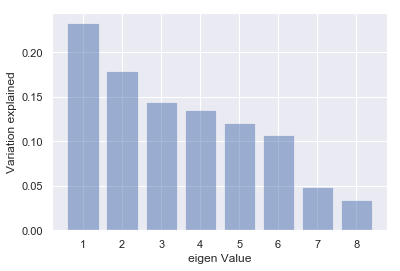

In [110]:
plt.bar(list(range(1,9)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

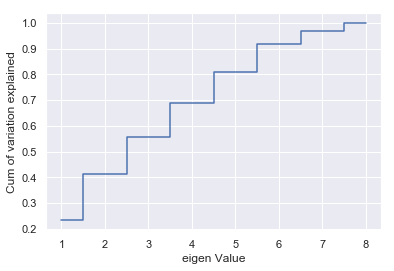

In [111]:
# Draw the elbow plot between the Eigen values and the Variances

plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [112]:
## More than 90% is covered at the eigen value of 6
## Tranforming the dataset by applying PCA

pca_6 = PCA(n_components=6)
pca_6.fit(XScaled)
print(pca_6.components_)
print(pca_6.explained_variance_ratio_)
Xpca_6 = pca_6.transform(XScaled)

[[ 0.15522763 -0.26348551 -0.06461761 -0.61624841  0.45101612 -0.08424335
   0.48992111 -0.2683413 ]
 [ 0.70567166 -0.28508883 -0.2687139   0.15015678  0.24845734 -0.22390392
  -0.29578688  0.35587042]
 [ 0.11061608 -0.41155226 -0.31928948 -0.18440512 -0.37657926  0.72363804
  -0.10302534 -0.07974728]
 [ 0.16916309  0.26989421  0.52412022 -0.25709736  0.40023218  0.43735923
  -0.45415889  0.00327398]
 [-0.13105182 -0.60325084  0.62276531 -0.00738594 -0.13815252 -0.05357762
   0.14535296  0.43351874]
 [-0.23779391  0.27246194 -0.29786491 -0.12112216  0.23424689  0.27234218
   0.27226912  0.75010141]]
[0.2326347  0.17850804 0.14366283 0.13471574 0.12096569 0.10702499]


In [113]:
Xpca_6

array([[-1.32847924, -1.22541092, -0.86105507,  0.01233129, -0.83579777,
         0.2605435 ],
       [ 1.2556253 , -0.95599286,  1.65653859,  0.30434711,  1.01081819,
         0.0149262 ],
       [-0.02859041, -0.52903959,  0.46553146, -1.75169248, -0.44841803,
         0.13302673],
       ...,
       [ 0.29570731,  0.58892888, -0.25067148, -1.42871332, -0.64214453,
        -0.31363476],
       [-2.34196634,  3.00269867, -0.09082536, -0.60614785,  2.42160606,
         1.2431929 ],
       [-0.38306838,  1.60237553,  2.0415393 ,  2.26769268, -0.95672169,
        -1.03737816]])

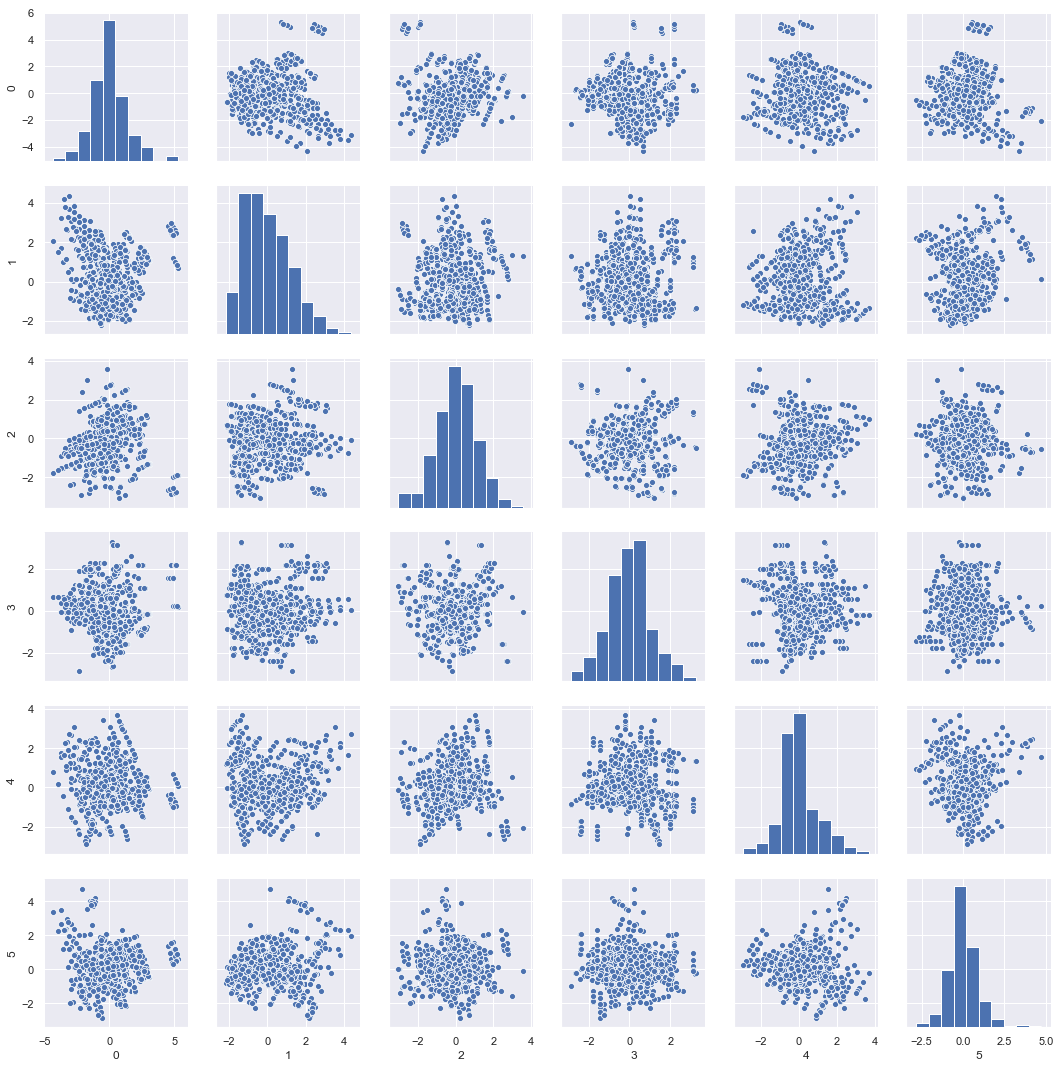

In [114]:
sns.pairplot(pd.DataFrame(Xpca_6)) # Apply pair plot on the new dataset after PCA.

In [115]:
## Splitting the dataset after PCA and apply all the basic regression models

Xpca_train, Xpca_test, y_train, y_test = train_test_split(Xpca_6, y, test_size=0.1, random_state=10)

In [116]:
Xpca_train, Xpca_val, y_train, y_val = train_test_split(Xpca_train, y_train, test_size=0.2, random_state=10)

In [117]:
svr_model2 = SVR()
print(svr_model2)

svr_model2.fit(Xpca_train,y_train)
svr_pred2 = svr_model2.predict(Xpca_train)

svr_score2=svr_model2.score(Xpca_val,y_val)
print(svr_score2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
0.40448171948363587


In [118]:
linear_model2 = LinearRegression()
linear_model2.fit(Xpca_train, y_train)
y_predict_linear = linear_model2.predict(Xpca_val)
coef_df = pd.DataFrame(linear_model2.coef_)
print(coef_df)

linear_model2_score = linear_model2.score(Xpca_val, y_val)
print("The Linear Regression model accuracy is {}".format(linear_model2_score))

          0
0  1.597586
1  7.632541
2 -0.567621
3  2.702700
4 -0.010744
5  2.940136
The Linear Regression model accuracy is 0.3831349701995809


In [119]:
poly = PolynomialFeatures(degree = 3)
xpoly = poly.fit_transform(Xpca_train)
model_3 = linear_model2.fit(xpoly,y_train)
pred = linear_model2.predict(xpoly)
taccuracy = r2_score(pred,y_train)
print("Accuracy of training set of degree 3 polynomial:",end='')
print(taccuracy)

xpoly = poly.fit_transform(Xpca_val)
pred = linear_model2.predict(xpoly)
ttaccuracy = r2_score(pred,y_val)
print("Accuracy of testing set of degree 3 polynomial:",end='')
print(ttaccuracy)

Accuracy of training set of degree 3 polynomial:0.40873352659391415
Accuracy of testing set of degree 3 polynomial:0.40198389233055387


In [120]:
poly = PolynomialFeatures(degree = 2)
xpoly = poly.fit_transform(Xpca_train)
model_3 = linear_model2.fit(xpoly,y_train)
pred = linear_model2.predict(xpoly)
taccuracy = r2_score(pred,y_train)
print("Accuracy of training set of degree 2 polynomial:",end='')
print(taccuracy)

xpoly = poly.fit_transform(Xpca_val)
pred = linear_model2.predict(xpoly)
ttaccuracy = r2_score(pred,y_val)
print("Accuracy of testing set of degree 2 polynomial:",end='')
print(ttaccuracy)

Accuracy of training set of degree 2 polynomial:0.04099717327357533
Accuracy of testing set of degree 2 polynomial:0.02588734652038993


In [121]:
poly = PolynomialFeatures(degree = 4)
xpoly = poly.fit_transform(Xpca_train)
model_3 = linear_model2.fit(xpoly,y_train)
pred = linear_model2.predict(xpoly)
taccuracy = r2_score(pred,y_train)
print("Accuracy of training set of degree 4 polynomial:",end='')
print(taccuracy)

xpoly = poly.fit_transform(Xpca_val)
pred = linear_model2.predict(xpoly)
ttaccuracy = r2_score(pred,y_val)
print("Accuracy of testing set of degree 4 polynomial:",end='')
print(ttaccuracy)

Accuracy of training set of degree 4 polynomial:0.7904353085063671
Accuracy of testing set of degree 4 polynomial:0.057243565668236074


In [122]:
ridge2 = Ridge(alpha=.3)
ridge2.fit(Xpca_train,y_train)
print ("Ridge model:", (ridge2.coef_))

print(ridge2.score(Xpca_train, y_train))
print(ridge2.score(Xpca_val, y_val))

Ridge model: [ 1.59736032  7.63031041 -0.56741031  2.70174352 -0.0108419   2.93860591]
0.3624422110931671
0.3831450853150846


In [123]:
lasso2 = Lasso(alpha=1)
lasso2.fit(Xpca_train,y_train)
print ("Lasso model:", (lasso2.coef_))

print(lasso2.score(Xpca_train, y_train))
print(lasso2.score(Xpca_val, y_val))

Lasso model: [ 1.1299981   6.91556046 -0.          1.79451169 -0.          1.7396582 ]
0.349577335950408
0.3577001012535827


In [124]:
knn_model2 = KNeighborsRegressor(n_neighbors=5)
knn_model2.fit(Xpca_train, y_train)
knn_pred2 = knn_model2.predict(Xpca_val)
knn_score2 =knn_model2.score(Xpca_val,y_val)
print(knn_score2)

0.5093802435670873


In [125]:
rf_model2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model2.fit(Xpca_train, y_train)

rf_pred2 = rf_model2.predict(Xpca_val)

rf_score2=rf_model2.score(Xpca_val, y_val)
print(rf_score2)

0.6845731562164045


Index(['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'strength'],
      dtype='object')
[0.06563287 0.59821215 0.03430131 0.1314919  0.         0.17036178]
Index(['ash', 'fineagg', 'superplastic', 'slag', 'water', 'coarseagg'], dtype='object') [0.06563287 0.59821215 0.03430131 0.1314919  0.         0.17036178]
0.35225158475463003


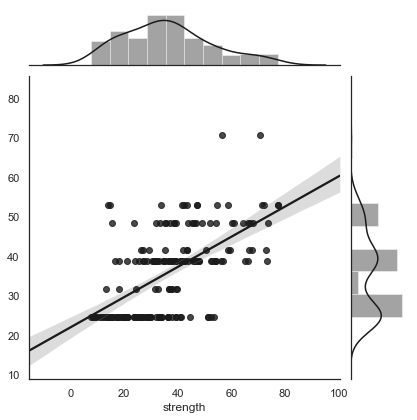

In [126]:
dtregr_2 = DecisionTreeRegressor(max_depth=3)
dtregr_2.fit(Xpca_train, y_train)
feature_importances = dtregr_2.feature_importances_

con_data_attr = con_data.iloc[:, 0:9]
feature_names = con_data_attr.columns[1:9]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

dtpred_2 = dtregr_2.predict(Xpca_val)

dt_score2=dtregr_2.score(Xpca_val, y_val)
print(dt_score2)

sns.set(style="darkgrid", color_codes=True)
         
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=dtpred_2, kind="reg", color="k");


From the above models, we can see that the Gradient Boost Regressor gives the better score which has the R2-score as 0.9387240316898807

In [127]:
#applying the selected model on test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                min_samples_split=170, n_estimators=230*2, 
                                random_state=1).fit(X_train_scaled, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(X_test_scaled)))

Test RMSE:  3.0574700326993933
Test R^2:  0.9627559578743651


The Gradient Boosting Regressor model gives the score of 0.9627559578743651 on the test data.